# Decode helper for Tensors and Dataframs

In [16]:
import pandas as pd
import numpy as np
import os
import pickle

processed_df = pd.read_pickle("Pickle_Files\sydneysiege_embeddings.pkl")

processed_df.head()

,tweet_id,user_id,user_screen_name,user_followers_count,user_friends_count,text,created_at,retweet_count,favorite_count,lang,geo,hashtags,mentions,urls,label,reply_to_tweet_id,tokenized_text,embedding
0,544267656597995521,258627226,KristyMayr7,1672,731,breaking hostages are being forced to hold an ...,Sun Dec 14 23:08:15 +0000 2014,445,54,en,NaN,7NEWS,NaN,NaN,1,NaN,"[breaking, hostages, forced, hold, isis, flag,...","[-0.18617383, -0.17521037, 0.2123546, -0.43570..."
1,544269152198721536,443573208,ottomanscribe,1192,607,that is not an is flag specifically,Sun Dec 14 23:14:12 +0000 2014,1,1,en,NaN,NaN,KristyMayr7,NaN,1,5.442677e+17,"[flag, specifically]","[-0.2378045, 0.1975549, -0.62391675, -0.249596..."
2,544269478406529024,2700238212,tlcrosemiller11,42,234,omg im watching it on,Sun Dec 14 23:15:30 +0000 2014,0,0,en,NaN,NaN,"KristyMayr7,morningshowon7",NaN,1,5.442677e+17,"[omg, im, watching]","[0.045373883, 0.45667937, 0.10446264, -0.20928..."
3,544270016770633728,760246262,tihrigby,147,846,dudes not the flag being used by isis httptc...,Sun Dec 14 23:17:38 +0000 2014,0,1,en,NaN,NaN,"KristyMayr7,DeepPolitics",http://www.pri.org/sites/default/files/ISISfla...,1,5.442677e+17,"[dudes, flag, isis, httptconuusj13kdo]","[-0.32397723, 0.022894418, -0.21357054, -0.119..."
4,544270351619067904,2670053628,SloaneSW7,299,614,how pathetic these poor people,Sun Dec 14 23:18:58 +0000 2014,0,0,en,NaN,NaN,"KristyMayr7,bluebuzzbird",NaN,1,5.442677e+17,"[pathetic, poor, people]","[-0.21798716, 0.49926534, -0.6323743, -0.25460..."


C:\Users\matth\AppData\Local\Temp\ipykernel_35300\2322889072.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  processed_df['created_at'] = pd.to_datetime(processed_df['created_at'])


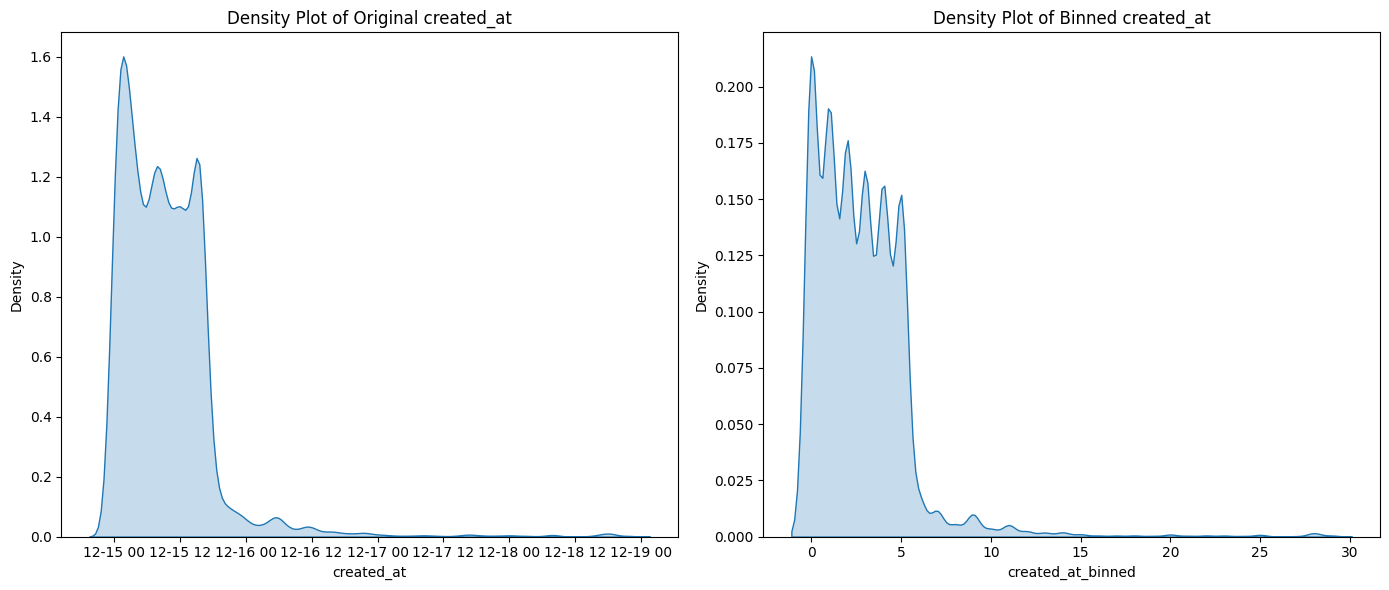

In [24]:
# Re-run the necessary steps from earlier to set up the DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pickle file (simulating user loading the file)
processed_df = pd.read_pickle("Pickle_Files/sydneysiege_embeddings.pkl")

# Ensure the 'created_at' column is in datetime format
processed_df['created_at'] = pd.to_datetime(processed_df['created_at'])

# Function to bin the 'created_at' column
def bin_created_at(df, num_bins):
    # Create bins based on the range of dates in the 'created_at' column
    df['created_at_binned'] = pd.cut(df['created_at'], bins=num_bins, labels=False)
    return df

# Specify the number of bins you want
num_bins = 30

# Apply the binning function
processed_df_binned = bin_created_at(processed_df, num_bins)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original 'created_at' density plot
sns.kdeplot(processed_df['created_at'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot of Original created_at')
axes[0].set_xlabel('created_at')

# Plot the binned 'created_at_binned' density plot
sns.kdeplot(processed_df_binned['created_at_binned'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot of Binned created_at')
axes[1].set_xlabel('created_at_binned')

# Show the plots
plt.tight_layout()
plt.show()



In [23]:
processed_df_binned.head()

,tweet_id,user_id,user_screen_name,user_followers_count,user_friends_count,text,created_at,retweet_count,favorite_count,lang,...,tokenized_text,embedding,tweet_id_binned,user_id_binned,user_followers_count_binned,user_friends_count_binned,created_at_binned,retweet_count_binned,favorite_count_binned,reply_to_tweet_id_binned
0,1987-04-01 09:27:36.597995521,1970-01-01 00:00:00.258627226,KristyMayr7,1970-01-01 00:00:00.000001672,1970-01-01 00:00:00.000000731,breaking hostages are being forced to hold an ...,2014-12-14 23:08:15+00:00,1970-01-01 00:00:00.000000445,1970-01-01 00:00:00.000000054,en,...,"[breaking, hostages, forced, hold, isis, flag,...","[-0.18617383, -0.17521037, 0.2123546, -0.43570...",1970-01-01,1970-01-01 00:00:00.000000000,0,0,1970-01-01,0,0,NaT
1,1987-04-01 09:52:32.198721536,1970-01-01 00:00:00.443573208,ottomanscribe,1970-01-01 00:00:00.000001192,1970-01-01 00:00:00.000000607,that is not an is flag specifically,2014-12-14 23:14:12+00:00,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,en,...,"[flag, specifically]","[-0.2378045, 0.1975549, -0.62391675, -0.249596...",1970-01-01,1970-01-01 00:00:00.000000001,0,0,1970-01-01,0,0,1970-01-01
2,1987-04-01 09:57:58.406529024,1970-01-01 00:00:02.700238212,tlcrosemiller11,1970-01-01 00:00:00.000000042,1970-01-01 00:00:00.000000234,omg im watching it on,2014-12-14 23:15:30+00:00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,en,...,"[omg, im, watching]","[0.045373883, 0.45667937, 0.10446264, -0.20928...",1970-01-01,1970-01-01 00:00:00.000000009,0,0,1970-01-01,0,0,1970-01-01
3,1987-04-01 10:06:56.770633728,1970-01-01 00:00:00.760246262,tihrigby,1970-01-01 00:00:00.000000147,1970-01-01 00:00:00.000000846,dudes not the flag being used by isis httptc...,2014-12-14 23:17:38+00:00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,en,...,"[dudes, flag, isis, httptconuusj13kdo]","[-0.32397723, 0.022894418, -0.21357054, -0.119...",1970-01-01,1970-01-01 00:00:00.000000002,0,0,1970-01-01,0,0,1970-01-01
4,1987-04-01 10:12:31.619067904,1970-01-01 00:00:02.670053628,SloaneSW7,1970-01-01 00:00:00.000000299,1970-01-01 00:00:00.000000614,how pathetic these poor people,2014-12-14 23:18:58+00:00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,en,...,"[pathetic, poor, people]","[-0.21798716, 0.49926534, -0.6323743, -0.25460...",1970-01-01,1970-01-01 00:00:00.000000009,0,0,1970-01-01,0,0,1970-01-01
